#Import Library

melakukan import librarry untuk persiapan praproses data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.svm import SVR
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from scipy import stats
import pyarrow as pa
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras
from sklearn.metrics import mean_absolute_percentage_error
from tabulate import tabulate

##Load Dataaset

In [ ]:
# Melakukan Load dataset
ntt = pd.read_csv('https://raw.githubusercontent.com/Arin1206/datasetFPKel10/main/NTT%202015%20-%202022.csv')
ntt.head(10)

,datetime,total_visitor,total_accomodation
0,1/1/2014,22881.0,9024
1,2/1/2014,19794.0,9058
2,3/1/2014,26642.0,9103
3,4/1/2014,33478.0,9187
4,5/1/2014,36289.0,9247
5,6/1/2014,39.1,9271
6,7/1/2014,41911.0,9348
7,8/1/2014,44722.0,9378
8,9/1/2014,47533.0,9400
9,10/1/2014,50344.0,9495


##Menampilkan Informasi Tipe Data

In [ ]:
ntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            108 non-null    object 
 1   total_visitor       108 non-null    float64
 2   total_accomodation  108 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


##Menampilkan Missing Value

In [ ]:
ntt.isnull().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

## Mengecek Baris Duplikat

Didapatkan dari dataset terdapat 0 baris missing value

In [ ]:
jumlah_baris_duplikat = ntt.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


##Merubah Format Time dan Set Index

In [ ]:
ntt0 = ntt.copy()

ntt0.head()

,datetime,total_visitor,total_accomodation
0,1/1/2014,22881.0,9024
1,2/1/2014,19794.0,9058
2,3/1/2014,26642.0,9103
3,4/1/2014,33478.0,9187
4,5/1/2014,36289.0,9247


In [ ]:
ntt.rename(columns={'datetime': 'Periode'}, inplace=True)
ntt['Periode'] = pd.to_datetime(ntt['Periode'], format='%m/%d/%Y')
ntt = ntt.set_index('Periode')
ntt.head()

,total_visitor,total_accomodation
Periode,,
2014-01-01,22881.0,9024
2014-02-01,19794.0,9058
2014-03-01,26642.0,9103
2014-04-01,33478.0,9187
2014-05-01,36289.0,9247


# LSTM

In [ ]:
ntt_lstm = ntt.copy()

# print out sample dataset
print(len(ntt_lstm))
ntt_lstm.head()

108


,total_visitor,total_accomodation
Periode,,
2014-01-01,22881.0,9024
2014-02-01,19794.0,9058
2014-03-01,26642.0,9103
2014-04-01,33478.0,9187
2014-05-01,36289.0,9247


In [ ]:
ntt_lstm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2014-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_visitor       108 non-null    float64
 1   total_accomodation  108 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [ ]:
ntt_lstm.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

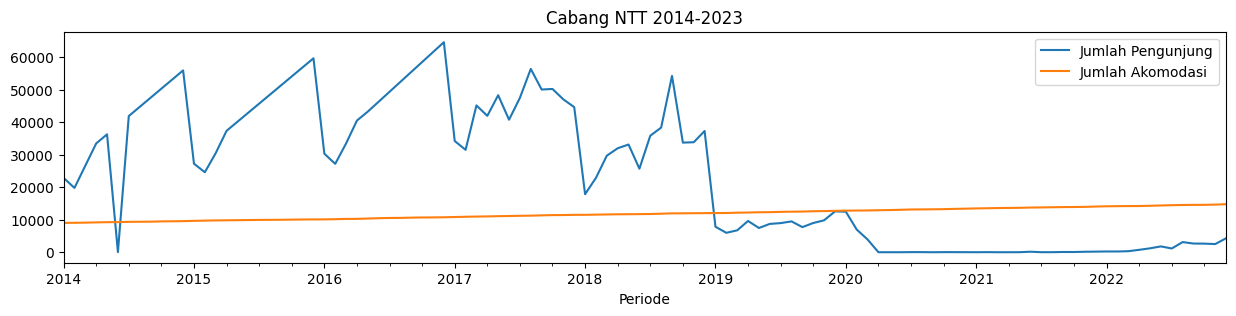

In [ ]:
# Menampilkan plot grafik jumlah pengunjung (total_visitor) seiring periode waktu
ntt_lstm.plot(figsize=(15, 3),legend=True)
plt.title("Cabang NTT 2014-2023")
plt.legend(["Jumlah Pengunjung", "Jumlah Akomodasi"])
plt.show()

In [ ]:
# Normalize the data
scaler_lstm = MinMaxScaler()
ntt_scaled = scaler_lstm.fit_transform(ntt_lstm)

ntt_scaled

array([[3.53981343e-01, 0.00000000e+00],
       [3.06223797e-01, 5.90482807e-03],
       [4.12166030e-01, 1.37200417e-02],
       [5.17922616e-01, 2.83084404e-02],
       [5.61410294e-01, 3.87287253e-02],
       [6.04897972e-04, 4.28968392e-02],
       [6.48385650e-01, 5.62695380e-02],
       [6.91873327e-01, 6.14796804e-02],
       [7.35361005e-01, 6.53004515e-02],
       [7.78848683e-01, 8.17992358e-02],
       [8.22336360e-01, 8.66620354e-02],
       [8.65824038e-01, 9.41299062e-02],
       [4.21649469e-01, 1.09239319e-01],
       [3.80915546e-01, 1.22612018e-01],
       [4.71743065e-01, 1.33205974e-01],
       [5.78041121e-01, 1.39458145e-01],
       [6.21219388e-01, 1.46057659e-01],
       [6.64397655e-01, 1.52483501e-01],
       [7.07575922e-01, 1.60125043e-01],
       [7.50754189e-01, 1.63077457e-01],
       [7.93932456e-01, 1.67419243e-01],
       [8.37141664e-01, 1.75234456e-01],
       [8.80288990e-01, 1.82007642e-01],
       [9.23467257e-01, 1.86696770e-01],
       [4.691594

## 80% Train - 20% Test

In [ ]:
# Split the data into training and testing sets
ntt_val =  ntt_lstm.values
train_lstm80 = int(len(ntt_val) * 0.8)
test_lstm20 = len(ntt_val) - train_lstm80
train80, test20 = ntt_scaled[0:train_lstm80,:], ntt_scaled[train_lstm80:len(ntt_val),:]

print(len(train80), len(test20))

86 22


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back):
        dataX.append(data[i:(i+look_back), 0:data.shape[1]])
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 10
X_train80, y_train80 = create_dataset(train80, look_back)
X_test20, y_test20 = create_dataset(test20, look_back)

In [ ]:
# Reshape the output (y) to ensure it is a 2D array
y_train80 = y_train80.reshape(-1, 1)
y_test20 = y_test20.reshape(-1, 1)

# reshape input to be [samples, time steps, features]
X_train80 = np.reshape(X_train80, (X_train80.shape[0], 2, X_train80.shape[1]))
X_test20 = np.reshape(X_test20, (X_test20.shape[0], 2, X_test20.shape[1]))

print("Train X shape:", X_train80.shape)
print("Train Y shape:", y_train80.shape)
print("Test X shape:", X_test20.shape)
print("Test Y shape:", y_test20.shape)

Train X shape: (76, 2, 10)
Train Y shape: (76, 1)
Test X shape: (12, 2, 10)
Test Y shape: (12, 1)


In [ ]:
# Build the LSTM model
lstm80_model = Sequential()

# First LSTM layer
lstm80_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train80.shape[1], look_back)))

# Second LSTM layer
lstm80_model.add(LSTM(100, activation='relu'))

# Output layer
lstm80_model.add(Dense(1))  # Assuming you want to predict 1 feature (visitor)

lstm80_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm80_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 2, 100)            44400     
                                                                 
 lstm_37 (LSTM)              (None, 100)               80400     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 124901 (487.89 KB)
Trainable params: 124901 (487.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history80 = lstm80_model.fit(
    X_train80, y_train80,
    epochs=100,
    batch_size=32,
    verbose=2,
    validation_split=0.2,  # Use part of the training data as validation
)

Epoch 1/100
2/2 - 3s - loss: 0.3854 - val_loss: 0.0058 - 3s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.3594 - val_loss: 0.0053 - 42ms/epoch - 21ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3355 - val_loss: 0.0056 - 38ms/epoch - 19ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3116 - val_loss: 0.0069 - 43ms/epoch - 21ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2860 - val_loss: 0.0096 - 42ms/epoch - 21ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2580 - val_loss: 0.0143 - 48ms/epoch - 24ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2302 - val_loss: 0.0219 - 43ms/epoch - 21ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1985 - val_loss: 0.0338 - 44ms/epoch - 22ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1652 - val_loss: 0.0518 - 44ms/epoch - 22ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1352 - val_loss: 0.0783 - 43ms/epoch - 21ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1043 - val_loss: 0.1149 - 42ms/epoch - 21ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0817 - val_loss: 0.1600 - 43ms/epoch - 21ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0781 - va

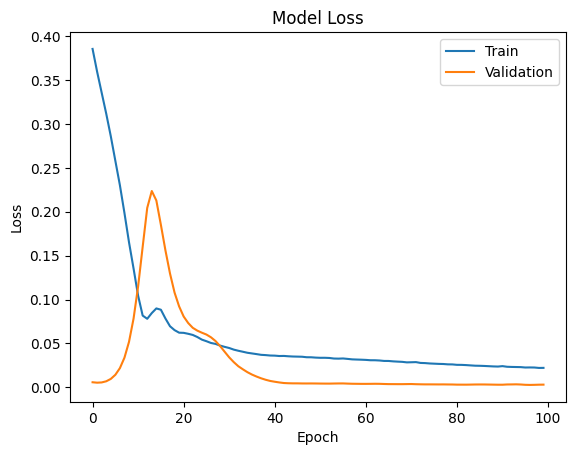

In [ ]:
# Plot training & validation loss values
plt.plot(history80.history['loss'])
plt.plot(history80.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred20_scaled = lstm80_model.predict(X_test20)

print("Shape Hasil Prediksi:", y_pred20_scaled.shape)
print("Hasil Prediksi:", y_pred20_scaled)

1/1 [==============================] - 0s 427ms/step
Shape Hasil Prediksi: (12, 1)
Hasil Prediksi: [[ 3.6435202e-03]
 [ 1.9461866e-03]
 [-1.6503036e-05]
 [-1.6399100e-03]
 [-2.6085600e-03]
 [-3.3321828e-03]
 [-3.8944930e-03]
 [-6.2974058e-03]
 [-6.8075880e-03]
 [-8.2224980e-03]
 [-8.5746124e-03]
 [-9.3411952e-03]]


In [ ]:
y_pred20_sc = np.repeat(y_pred20_scaled,2, axis=-1)
y_pred20 = scaler_lstm.inverse_transform(np.reshape(y_pred20_sc,(len(y_pred20_scaled),2)))[:,0]

y_test20_sc = np.repeat(y_test20,2, axis=-1)
y_test20_re = scaler_lstm.inverse_transform(np.reshape(y_test20_sc,(len(y_test20),2)))[:,0]

In [ ]:
print("Original Test Shape:", y_test20.shape)
print("Transformed Test Shape:", y_test20_re.shape)
print("Predicted Shape:", y_pred20.shape)

Original Test Shape: (12, 1)
Transformed Test Shape: (12,)
Predicted Shape: (12,)


In [ ]:
# print("Original Test Subset:", y_test20)
print("Transformed Test Subset:", y_test20_re)
print("Predicted Subset:", y_pred20)

Transformed Test Subset: [ 234.  226.  317.  737. 1203. 1792. 1149. 3120. 2672. 2646. 2511. 4300.]
Predicted Subset: [ 235.5135     125.79956     -1.0667398 -106.002144  -168.61472
 -215.38896   -251.73613   -407.058     -440.03568   -531.494
 -554.2544    -603.80554  ]


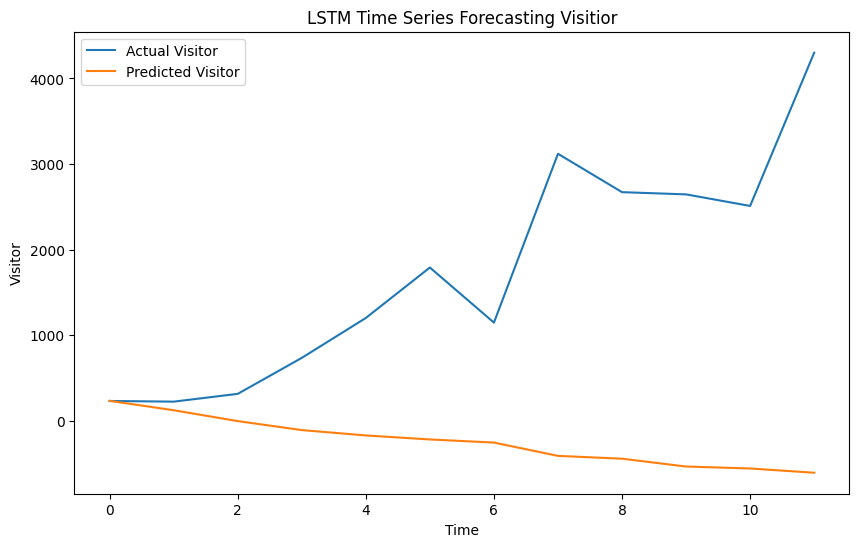

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test20_re, label='Actual Visitor')
plt.plot(y_pred20, label='Predicted Visitor')
plt.title('LSTM Time Series Forecasting Visitior')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()

plt.show()

In [ ]:
# Calculate MSE, RMSE, MAPE
mse_test1 = mean_squared_error(y_test20_re, y_pred20).round(2)
mae_test1 = mean_absolute_error(y_test20_re, y_pred20).round(2)
mape_test1 = mean_absolute_percentage_error(y_test20_re, y_pred20).round(2)

print(f"Mean Squared Error (MSE): {mse_test1}")
print(f"Mean Absolute Error (MAE): {mae_test1}")
print(f"Mean Absolute Percetange Error (MAPE): {mape_test1} %")

Mean Squared Error (MSE): 6196610.53
Mean Absolute Error (MAE): 1985.68
Mean Absolute Percetange Error (MAPE): 0.99 %


In [ ]:
# Membuat prediksi visitor menggunakan X_train
y_pred80 = lstm80_model.predict(X_train80)

3/3 [==============================] - 0s 5ms/step


In [ ]:
# Calculate MSE, RMSE, MAPE
mse_train1 = mean_squared_error(y_train80, y_pred80).round(2)
mae_train1 = mean_absolute_error(y_train80, y_pred80).round(2)
mape_train1 = mean_absolute_percentage_error(y_train80, y_pred80).round(2)

print(f"Mean Squared Error (MSE): {mse_train1}")
print(f"Mean Absolute Error (MAE): {mae_train1}")
print(f"Mean Absolute Percetange Error (MAPE): {mape_train1} %")

Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.1
Mean Absolute Percetange Error (MAPE): 13026066045727.44 %


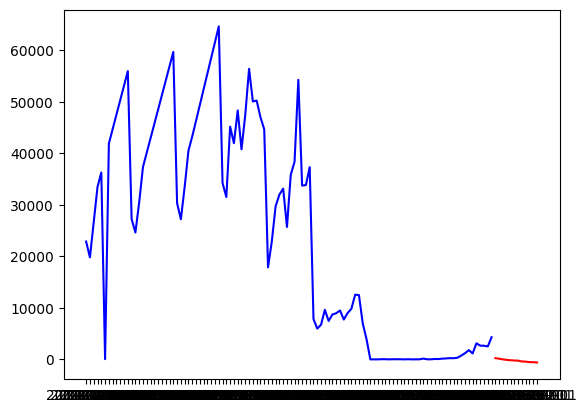

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = 12

# create a list of dates for next 12 months
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')
date_index = pd.to_datetime(date_index, format='%Y-%m-%d')
date_index = date_index.strftime('%Y-%m-%d')

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(y_pred20, columns=['total_visitor'], index=date_index)

ntt_copy = ntt0.copy()
ntt_copy['datetime'] = pd.to_datetime(ntt_copy['datetime'], format='%d/%m/%Y')
ntt_copy['datetime'] = ntt_copy['datetime'].dt.strftime('%Y-%m-%d')
ntt_copy.set_index("datetime", inplace = True)


# Plot the actual values from the training set
fig, ax = plt.subplots()
ax.plot(ntt_copy['total_visitor'], color='blue')
# Plot the predicted values
ax.plot(df_test['total_visitor'], color='red')
from datetime import datetime
plt.show()


In [ ]:
# Creating a DataFrame from the array
res20_df = pd.DataFrame(y_pred20, columns=['Prediksi Jumlah Pengunjung'])


# Membulatkan nilai dalam kolom 'y_pred' menjadi integer
res20_df['Prediksi Jumlah Pengunjung'] = res20_df['Prediksi Jumlah Pengunjung'].round().astype(int)

# Displaying the DataFrame
print(res20_df)

    Prediksi Jumlah Pengunjung
0                          236
1                          126
2                           -1
3                         -106
4                         -169
5                         -215
6                         -252
7                         -407
8                         -440
9                         -531
10                        -554
11                        -604


In [ ]:
resdate = []
resdate = pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
                           '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'])

# Creating a DataFrame from the array
resdate_df = pd.DataFrame(resdate, columns=['Datetime'])

# Displaying the DataFrame
print(resdate_df)

     Datetime
0  2023-01-01
1  2023-02-01
2  2023-03-01
3  2023-04-01
4  2023-05-01
5  2023-06-01
6  2023-07-01
7  2023-08-01
8  2023-09-01
9  2023-10-01
10 2023-11-01
11 2023-12-01


In [ ]:
# Mengonversi indeks result_df menjadi kolom 'Periode'
res20_df['Datetime'] = res20_df.index

# Menggabungkan DataFrame result_df dan resdate_df menggunakan pd.concat
result20 = pd.concat([resdate_df, res20_df[['Prediksi Jumlah Pengunjung']]], axis=1)

result20

,Datetime,Prediksi Jumlah Pengunjung
0,2023-01-01,236
1,2023-02-01,126
2,2023-03-01,-1
3,2023-04-01,-106
4,2023-05-01,-169
5,2023-06-01,-215
6,2023-07-01,-252
7,2023-08-01,-407
8,2023-09-01,-440
9,2023-10-01,-531


## 70% Train - 30% Test

In [ ]:
# Split the data into training and testing sets
ntt_val =  ntt_lstm.values
train_lstm70 = int(len(ntt_val) * 0.7)
test_lstm30 = len(ntt_val) - train_lstm70
train70, test30 = ntt_scaled[0:train_lstm70,:], ntt_scaled[train_lstm70:len(ntt_val),:]

print(len(train70), len(test30))

75 33


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        dataX.append(data[i:(i+look_back), 0:data.shape[1]])
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 12
X_train70, y_train70 = create_dataset(train70, look_back)
X_test30, y_test30 = create_dataset(test30, look_back)

In [ ]:
# Reshape the output (y) to ensure it is a 2D array
y_train70 = y_train70.reshape(-1, 1)
y_test30 = y_test30.reshape(-1, 1)

# reshape input to be [samples, time steps, features]
X_train70 = np.reshape(X_train70, (X_train70.shape[0], 2, X_train70.shape[1]))
X_test30 = np.reshape(X_test30, (X_test30.shape[0], 2, X_test30.shape[1]))

print("Train X shape:", X_train70.shape)
print("Train Y shape:", y_train70.shape)
print("Test X shape:", X_test30.shape)
print("Test Y shape:", y_test30.shape)

Train X shape: (62, 2, 12)
Train Y shape: (62, 1)
Test X shape: (20, 2, 12)
Test Y shape: (20, 1)


In [ ]:
# Build the LSTM model
lstm70_model = Sequential()

# First LSTM layer
lstm70_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train70.shape[1], look_back)))

# Second LSTM layer
lstm70_model.add(LSTM(100, activation='relu'))

# Output layer
lstm70_model.add(Dense(1))  # Assuming you want to predict 1 feature (visitor)

# optimizer = Adam(learning_rate=0.001)
lstm70_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm70_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 2, 100)            45200     
                                                                 
 lstm_39 (LSTM)              (None, 100)               80400     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 125701 (491.02 KB)
Trainable params: 125701 (491.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history70 = lstm70_model.fit(
    X_train70, y_train70,
    epochs=100,
    batch_size=32,
    verbose=2,
    validation_split=0.3,  # Use part of the training data as validation
)

Epoch 1/100
2/2 - 3s - loss: 0.4570 - val_loss: 0.1091 - 3s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.4327 - val_loss: 0.1008 - 41ms/epoch - 20ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4099 - val_loss: 0.0928 - 39ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3866 - val_loss: 0.0846 - 40ms/epoch - 20ms/step
Epoch 5/100
2/2 - 0s - loss: 0.3601 - val_loss: 0.0759 - 39ms/epoch - 19ms/step
Epoch 6/100
2/2 - 0s - loss: 0.3307 - val_loss: 0.0668 - 41ms/epoch - 21ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2978 - val_loss: 0.0576 - 39ms/epoch - 20ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2597 - val_loss: 0.0492 - 43ms/epoch - 22ms/step
Epoch 9/100
2/2 - 0s - loss: 0.2185 - val_loss: 0.0429 - 40ms/epoch - 20ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1728 - val_loss: 0.0411 - 41ms/epoch - 21ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1262 - val_loss: 0.0480 - 41ms/epoch - 21ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0813 - val_loss: 0.0701 - 43ms/epoch - 22ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0494 - va

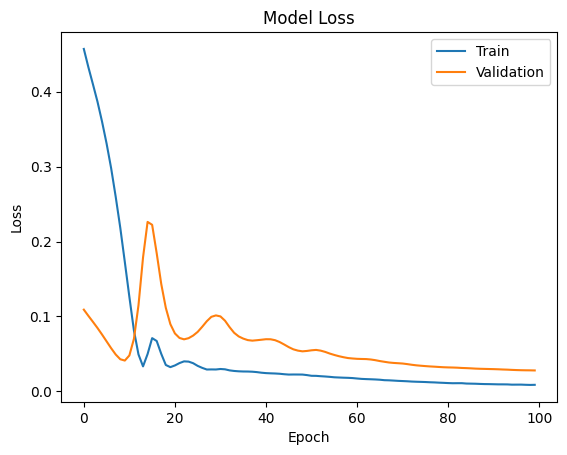

In [ ]:
# Plot training & validation loss values
plt.plot(history70.history['loss'])
plt.plot(history70.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred30_scaled = lstm70_model.predict(X_test30)

print("Shape Hasil Prediksi:", y_pred30_scaled.shape)
print("Hasil Prediksi:", y_pred30_scaled)

1/1 [==============================] - 0s 309ms/step
Shape Hasil Prediksi: (20, 1)
Hasil Prediksi: [[0.16364329]
 [0.16428101]
 [0.16500986]
 [0.1658352 ]
 [0.16650249]
 [0.16720378]
 [0.16793716]
 [0.16867527]
 [0.16939726]
 [0.17000593]
 [0.17076954]
 [0.17155887]
 [0.17217372]
 [0.17289221]
 [0.17370568]
 [0.17444023]
 [0.17529425]
 [0.17667857]
 [0.1776485 ]
 [0.1786266 ]]
1/1 [==============================] - 0s 303ms/step
Shape Hasil Prediksi: (20, 1)
Hasil Prediksi: [[-0.00906394]
 [-0.00917388]
 [-0.00924299]
 [-0.00930996]
 [-0.00946462]
 [-0.00960425]
 [-0.00974858]
 [-0.00987536]
 [-0.00996384]
 [-0.0100054 ]
 [-0.01014538]
 [-0.0102747 ]
 [-0.01041799]
 [-0.0105268 ]
 [-0.01054808]
 [-0.01059523]
 [-0.01070281]
 [-0.0108558 ]
 [-0.01101698]
 [-0.01108025]]


In [ ]:
y_pred30_sc = np.repeat(y_pred30_scaled,2, axis=-1)
y_pred30 = scaler_lstm.inverse_transform(np.reshape(y_pred30_sc,(len(y_pred30_scaled),2)))[:,0]

y_test30_sc = np.repeat(y_test30,2, axis=-1)
y_test30_re = scaler_lstm.inverse_transform(np.reshape(y_test30_sc,(len(y_test30),2)))[:,0]

In [ ]:
print("Original Test Shape:", y_test30.shape)
print("Transformed Test Shape:", y_test30_re.shape)
print("Predicted Shape:", y_pred30.shape)

Original Test Shape: (20, 1)
Transformed Test Shape: (20,)
Predicted Shape: (20,)
Original Test Shape: (20, 1)
Transformed Test Shape: (20,)
Predicted Shape: (20,)


In [ ]:
# print("Original Test Subset:", y_test20)
print("Transformed Test Subset:", y_test30_re)
print("Predicted Subset:", y_pred30)

Transformed Test Subset: [3.000e+00 1.300e+01 1.520e+02 1.200e+01 1.200e+01 7.300e+01 6.400e+01
 1.420e+02 1.840e+02 2.340e+02 2.260e+02 3.170e+02 7.370e+02 1.203e+03
 1.792e+03 1.149e+03 3.120e+03 2.672e+03 2.646e+03 2.511e+03]
Predicted Subset: [10577.738 10618.96  10666.072 10719.422 10762.555 10807.886 10855.29
 10903.001 10949.67  10989.014 11038.372 11089.394 11129.138 11175.58
 11228.161 11275.643 11330.845 11420.326 11483.021 11546.244]
Transformed Test Subset: [3.000e+00 1.300e+01 1.520e+02 1.200e+01 1.200e+01 7.300e+01 6.400e+01
 1.420e+02 1.840e+02 2.340e+02 2.260e+02 3.170e+02 7.370e+02 1.203e+03
 1.792e+03 1.149e+03 3.120e+03 2.672e+03 2.646e+03 2.511e+03]
Predicted Subset: [-585.88416 -592.99054 -597.45746 -601.78644 -611.7836  -620.809
 -630.13837 -638.3332  -644.0528  -646.73883 -655.7875  -664.1465
 -673.40826 -680.4418  -681.81744 -684.8648  -691.8188  -701.70807
 -712.1263  -716.21655]


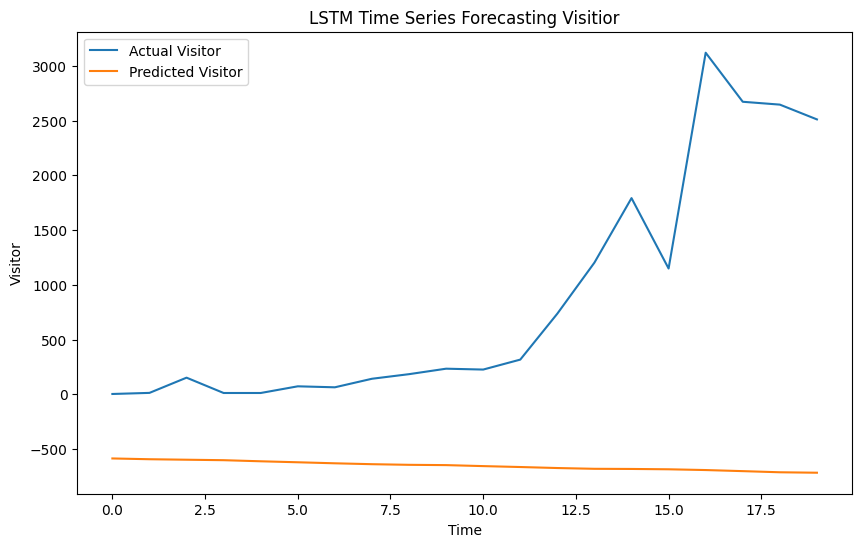

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test30_re, label='Actual Visitor')
plt.plot(y_pred30, label='Predicted Visitor')
plt.title('LSTM Time Series Forecasting Visitior')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()

plt.show()

In [ ]:
# Calculate MSE, MAE, MAPE
mse_test2 = mean_squared_error(y_test30_re, y_pred30).round(2)
mae_test2 = mean_absolute_error(y_test30_re, y_pred30).round(2)
mape_test2 = mean_absolute_percentage_error(y_test30_re, y_pred30).round(2)

print(f"Mean Squared Error (MSE): {mse_test2}")
print(f"Mean Absolute Error (MAE): {mae_test2}")
print(f"Mean Absolute Percetange Error (MAPE): {mape_test2} %")

Mean Squared Error (MSE): 3471923.44
Mean Absolute Error (MAE): 1514.72
Mean Absolute Percetange Error (MAPE): 20.18 %


In [ ]:
# Membuat prediksi visitor menggunakan X_train
y_pred70 = lstm70_model.predict(X_train70)

# Calculate MSE, RMSE, MAPE
mse_train2 = mean_squared_error(y_train70, y_pred70).round(2)
mae_train2 = mean_absolute_error(y_train70, y_pred70).round(2)
mape_train2 = mean_absolute_percentage_error(y_train70, y_pred70).round(2)

print(f"Mean Squared Error (MSE): {mse_train2}")
print(f"Mean Absolute Error (MAE): {mae_train2}")
print(f"Mean Absolute Percetange Error (MAPE): {mape_train2} %")

2/2 [==============================] - 0s 8ms/step
Mean Squared Error (MSE): 0.36
Mean Absolute Error (MAE): 0.54
Mean Absolute Percetange Error (MAPE): 1.01 %


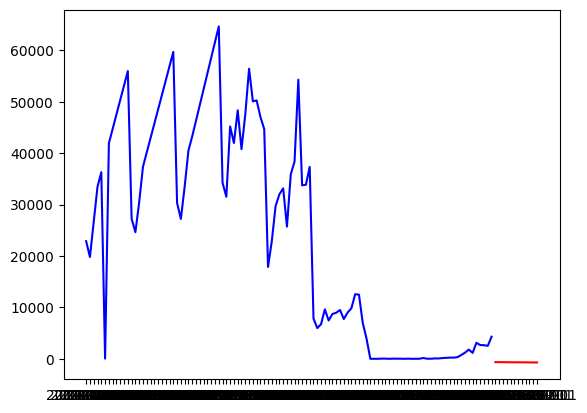

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = 12

# create a list of dates for next 12 months
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')
date_index = pd.to_datetime(date_index, format='%Y-%m-%d')
date_index = date_index.strftime('%Y-%m-%d')

# Create a DataFrame from the predictions array
y_pred30_12 = y_pred30[-12:]
df_test = pd.DataFrame(y_pred30_12, columns=['total_visitor'], index=date_index)

ntt_copy = ntt0.copy()
ntt_copy['datetime'] = pd.to_datetime(ntt_copy['datetime'], format='%d/%m/%Y')
ntt_copy['datetime'] = ntt_copy['datetime'].dt.strftime('%Y-%m-%d')
ntt_copy.set_index("datetime", inplace = True)


# Plot the actual values from the training set
fig, ax = plt.subplots()
ax.plot(ntt_copy['total_visitor'], color='blue')
# Plot the predicted values
ax.plot(df_test['total_visitor'], color='red')
from datetime import datetime
# ax.set_xlim([datetime.date(datetime.strptime('2023-01-01', '%Y-%m-%d')), datetime.date(datetime.strptime('2023-12-01', '%Y-%m-%d'))])
plt.show()


In [ ]:
# Creating a DataFrame from the array
res30_df = pd.DataFrame(y_pred30_12, columns=['Prediksi Jumlah Pengunjung'])

# Membulatkan nilai dalam kolom 'y_pred' menjadi integer
res30_df['Prediksi Jumlah Pengunjung'] = res30_df['Prediksi Jumlah Pengunjung'].round().astype(int)

# Displaying the DataFrame
print(res30_df)

    Prediksi Jumlah Pengunjung
0                         -644
1                         -647
2                         -656
3                         -664
4                         -673
5                         -680
6                         -682
7                         -685
8                         -692
9                         -702
10                        -712
11                        -716


In [ ]:
# Mengonversi indeks result_df menjadi kolom 'Periode'
res30_df['Datetime'] = res30_df.index

# Menggabungkan DataFrame result_df dan resdate_df menggunakan pd.concat
result30 = pd.concat([resdate_df, res30_df[['Prediksi Jumlah Pengunjung']]], axis=1)

result30

,Datetime,Prediksi Jumlah Pengunjung
0,2023-01-01,-644
1,2023-02-01,-647
2,2023-03-01,-656
3,2023-04-01,-664
4,2023-05-01,-673
5,2023-06-01,-680
6,2023-07-01,-682
7,2023-08-01,-685
8,2023-09-01,-692
9,2023-10-01,-702


## 60% Train - 40% Test

In [ ]:
# Split the data into training and testing sets
ntt_val =  ntt_lstm.values
train_lstm60 = int(len(ntt_val) * 0.6)
test_lstm40 = len(ntt_val) - train_lstm60
train60, test40 = ntt_scaled[0:train_lstm60,:], ntt_scaled[train_lstm60:len(ntt_val),:]

print(len(train60), len(test40))

64 44
64 44


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back):
        dataX.append(data[i:(i+look_back), 0:data.shape[1]])
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 12
X_train60, y_train60 = create_dataset(train60, look_back)
X_test40, y_test40 = create_dataset(test40, look_back)

In [ ]:
# Reshape the output (y) to ensure it is a 2D array
y_train60 = y_train60.reshape(-1, 1)
y_test40 = y_test40.reshape(-1, 1)

# reshape input to be [samples, time steps, features]
X_train60 = np.reshape(X_train60, (X_train60.shape[0], 2, X_train60.shape[1]))
X_test40 = np.reshape(X_test40, (X_test40.shape[0], 2, X_test40.shape[1]))

print("Train X shape:", X_train60.shape)
print("Train Y shape:", y_train60.shape)
print("Test X shape:", X_test40.shape)
print("Test Y shape:", y_test40.shape)

Train X shape: (52, 2, 12)
Train Y shape: (52, 1)
Test X shape: (32, 2, 12)
Test Y shape: (32, 1)
Train X shape: (52, 2, 12)
Train Y shape: (52, 1)
Test X shape: (32, 2, 12)
Test Y shape: (32, 1)


In [ ]:
# Build the LSTM model
lstm60_model = Sequential()

# First LSTM layer
lstm60_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train60.shape[1], look_back)))

# Second LSTM layer
lstm60_model.add(LSTM(100, activation='relu'))

# Output layer
lstm60_model.add(Dense(1))  # Assuming you want to predict 1 feature (visitor)

# optimizer = Adam(learning_rate=0.001)
lstm60_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm60_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 2, 100)            45200     
                                                                 
 lstm_35 (LSTM)              (None, 100)               80400     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 125701 (491.02 KB)
Trainable params: 125701 (491.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 2, 100)            45200     
                                                        

In [ ]:
# Train the model
history60 = lstm60_model.fit(
    X_train60, y_train60,
    epochs=100,
    batch_size=32,
    verbose=2,
    validation_split=0.4,  # Use part of the training data as validation
)

Epoch 1/100
1/1 - 3s - loss: 0.5175 - val_loss: 0.3028 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.5037 - val_loss: 0.2939 - 38ms/epoch - 38ms/step
Epoch 3/100
1/1 - 0s - loss: 0.4908 - val_loss: 0.2857 - 37ms/epoch - 37ms/step
Epoch 4/100
1/1 - 0s - loss: 0.4790 - val_loss: 0.2776 - 36ms/epoch - 36ms/step
Epoch 5/100
1/1 - 0s - loss: 0.4676 - val_loss: 0.2694 - 38ms/epoch - 38ms/step
Epoch 6/100
1/1 - 0s - loss: 0.4563 - val_loss: 0.2610 - 36ms/epoch - 36ms/step
Epoch 7/100
1/1 - 0s - loss: 0.4452 - val_loss: 0.2521 - 41ms/epoch - 41ms/step
Epoch 8/100
1/1 - 0s - loss: 0.4335 - val_loss: 0.2427 - 40ms/epoch - 40ms/step
Epoch 9/100
1/1 - 0s - loss: 0.4212 - val_loss: 0.2328 - 36ms/epoch - 36ms/step
Epoch 10/100
1/1 - 0s - loss: 0.4080 - val_loss: 0.2224 - 37ms/epoch - 37ms/step
Epoch 11/100
1/1 - 0s - loss: 0.3940 - val_loss: 0.2113 - 37ms/epoch - 37ms/step
Epoch 12/100
1/1 - 0s - loss: 0.3792 - val_loss: 0.1994 - 34ms/epoch - 34ms/step
Epoch 13/100
1/1 - 0s - loss: 0.3631 - va

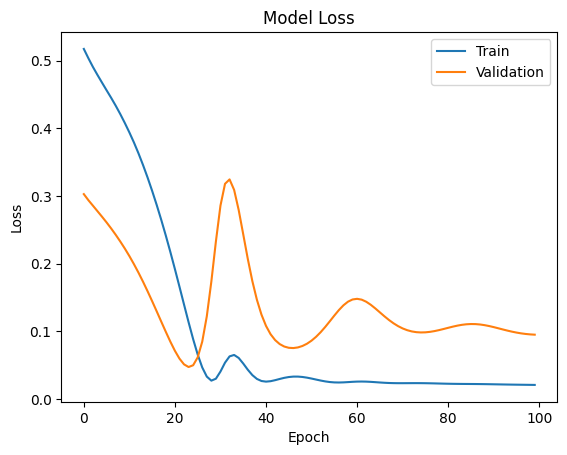

In [ ]:
# Plot training & validation loss values
plt.plot(history60.history['loss'])
plt.plot(history60.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred40_scaled = lstm60_model.predict(X_test40)

print("Shape Hasil Prediksi:", y_pred40_scaled.shape)
print("Hasil Prediksi:", y_pred40_scaled)

1/1 [==============================] - 0s 398ms/step
Shape Hasil Prediksi: (32, 1)
Hasil Prediksi: [[0.44352207]
 [0.44344878]
 [0.44270408]
 [0.44250622]
 [0.4420861 ]
 [0.4434231 ]
 [0.43990666]
 [0.43404412]
 [0.42290536]
 [0.4124171 ]
 [0.408033  ]
 [0.4074958 ]
 [0.41121525]
 [0.41491088]
 [0.4187207 ]
 [0.42212754]
 [0.4257971 ]
 [0.42966637]
 [0.4333449 ]
 [0.43669468]
 [0.4405753 ]
 [0.44428656]
 [0.44781786]
 [0.45145473]
 [0.45491225]
 [0.45888305]
 [0.46336913]
 [0.4680861 ]
 [0.47376987]
 [0.47882617]
 [0.48418787]
 [0.4897526 ]]


In [ ]:
y_pred40_sc = np.repeat(y_pred40_scaled,2, axis=-1)
y_pred40 = scaler_lstm.inverse_transform(np.reshape(y_pred40_sc,(len(y_pred40_scaled),2)))[:,0]

y_test40_sc = np.repeat(y_test40,2, axis=-1)
y_test40_re = scaler_lstm.inverse_transform(np.reshape(y_test40_sc,(len(y_test40),2)))[:,0]

In [ ]:
print("Original Test Shape:", y_test40.shape)
print("Transformed Test Shape:", y_test40_re.shape)
print("Predicted Shape:", y_pred40.shape)

Original Test Shape: (32, 1)
Transformed Test Shape: (32,)
Predicted Shape: (32,)


In [ ]:
# print("Original Test Subset:", y_test20)
print("Transformed Test Subset:", y_test40_re)
print("Predicted Subset:", y_pred40)

Transformed Test Subset: [2.000e+00 0.000e+00 3.500e+01 3.100e+01 0.000e+00 2.800e+01 2.600e+01
 1.300e+01 4.000e+00 2.600e+01 0.000e+00 3.000e+00 1.300e+01 1.520e+02
 1.200e+01 1.200e+01 7.300e+01 6.400e+01 1.420e+02 1.840e+02 2.340e+02
 2.260e+02 3.170e+02 7.370e+02 1.203e+03 1.792e+03 1.149e+03 3.120e+03
 2.672e+03 2.646e+03 2.511e+03 4.300e+03]
Predicted Subset: [28668.822 28664.086 28615.95  28603.16  28576.004 28662.426 28435.127
 28056.178 27336.18  26658.23  26374.846 26340.121 26580.543 26819.424
 27065.688 27285.902 27523.1   27773.205 28010.98  28227.508 28478.348
 28718.238 28946.498 29181.582 29405.072 29661.742 29951.717 30256.617
 30624.012 30950.844 31297.42  31657.117]


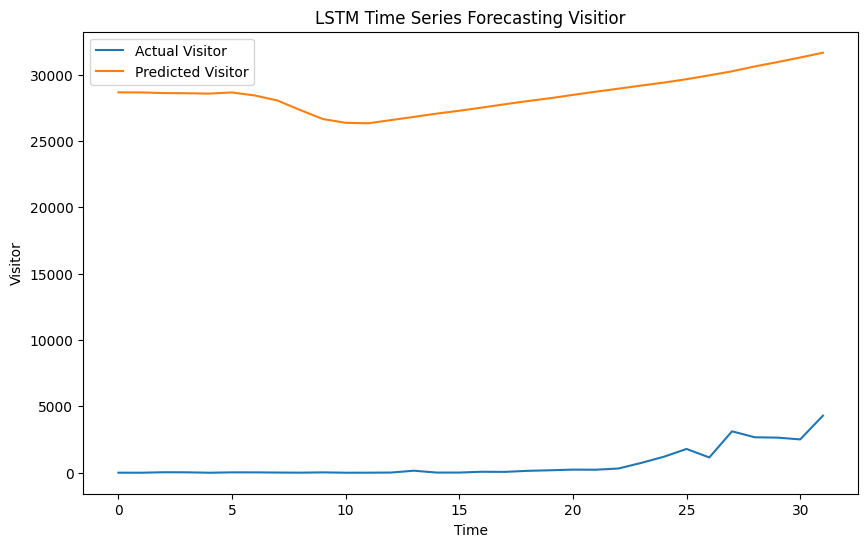

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test40_re, label='Actual Visitor')
plt.plot(y_pred40, label='Predicted Visitor')
plt.title('LSTM Time Series Forecasting Visitior')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()

plt.show()

In [ ]:
# Calculate MSE, MAE, MAPE
mse_test3 = mean_squared_error(y_test40_re, y_pred40).round(2)
mae_test3 = mean_absolute_error(y_test40_re, y_pred40).round(2)
mape_test3 = mean_absolute_percentage_error(y_test40_re, y_pred40).round(2)

print(f"Mean Squared Error (MSE): {mse_test3}")
print(f"Mean Absolute Error (MAE): {mae_test3}")
print(f"Mean Absolute Percetange Error (MAPE): {mape_test3} %")

Mean Squared Error (MSE): 777042701.36
Mean Absolute Error (MAE): 27864.99
Mean Absolute Percetange Error (MAPE): 1.1767756017859822e+19 %


In [ ]:
# Membuat prediksi visitor menggunakan X_train
y_pred60 = lstm60_model.predict(X_train60)

# Calculate MSE, RMSE, MAPE
mse_train3 = mean_squared_error(y_train60, y_pred60).round(2)
mae_train3 = mean_absolute_error(y_train60, y_pred60).round(2)
mape_train3 = mean_absolute_percentage_error(y_train60, y_pred60).round(2)

print(f"Mean Squared Error (MSE): {mse_train3}")
print(f"Mean Absolute Error (MAE): {mae_train3}")
print(f"Mean Absolute Percetange Error (MAPE): {mape_train3} %")

2/2 [==============================] - 0s 12ms/step
Mean Squared Error (MSE): 0.05
Mean Absolute Error (MAE): 0.18
Mean Absolute Percetange Error (MAPE): 0.61 %


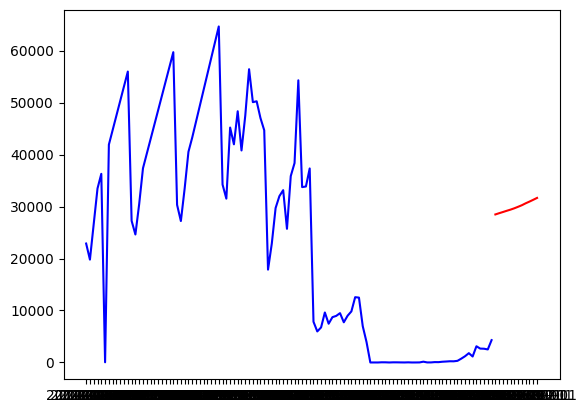

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = 12

# create a list of dates for next 12 months
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')
date_index = pd.to_datetime(date_index, format='%Y-%m-%d')
date_index = date_index.strftime('%Y-%m-%d')

# Create a DataFrame from the predictions array
y_pred40_12 = y_pred40[-12:]
df_test = pd.DataFrame(y_pred40_12, columns=['total_visitor'], index=date_index)

ntt_copy = ntt0.copy()
ntt_copy['datetime'] = pd.to_datetime(ntt_copy['datetime'], format='%d/%m/%Y')
ntt_copy['datetime'] = ntt_copy['datetime'].dt.strftime('%Y-%m-%d')
ntt_copy.set_index("datetime", inplace = True)


# Plot the actual values from the training set
fig, ax = plt.subplots()
ax.plot(ntt_copy['total_visitor'], color='blue')
# Plot the predicted values
ax.plot(df_test['total_visitor'], color='red')
from datetime import datetime
# ax.set_xlim([datetime.date(datetime.strptime('2023-01-01', '%Y-%m-%d')), datetime.date(datetime.strptime('2023-12-01', '%Y-%m-%d'))])
plt.show()


In [ ]:
# Creating a DataFrame from the array
res40_df = pd.DataFrame(y_pred40_12, columns=['Prediksi Jumlah Pengunjung'])


# Membulatkan nilai dalam kolom 'y_pred' menjadi integer
res40_df['Prediksi Jumlah Pengunjung'] = res40_df['Prediksi Jumlah Pengunjung'].round().astype(int)

# Displaying the DataFrame
print(res40_df)

    Prediksi Jumlah Pengunjung
0                        28478
1                        28718
2                        28946
3                        29182
4                        29405
5                        29662
6                        29952
7                        30257
8                        30624
9                        30951
10                       31297
11                       31657


In [ ]:
# Mengonversi indeks result_df menjadi kolom 'Periode'
res40_df['Datetime'] = res40_df.index

# Menggabungkan DataFrame result_df dan resdate_df menggunakan pd.concat
result40 = pd.concat([resdate_df, res40_df[['Prediksi Jumlah Pengunjung']]], axis=1)

result40

,Datetime,Prediksi Jumlah Pengunjung
0,2023-01-01,28478
1,2023-02-01,28718
2,2023-03-01,28946
3,2023-04-01,29182
4,2023-05-01,29405
5,2023-06-01,29662
6,2023-07-01,29952
7,2023-08-01,30257
8,2023-09-01,30624
9,2023-10-01,30951


## Kesimpulan LSTM

In [ ]:
# Define the data for each scenario
scenario_data = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'RNN Train 80',
        'MSE': mse_train1,
        'MAE': mae_train1,
        'MAPE (%)': mape_train1
    },
    {
    'Scenario': 'Scenario 1',
        'Model': 'RNN Test 80',
        'MSE': mse_test1,
        'MAE': mae_test1,
        'MAPE (%)': mape_test1
    },
   {
        'Scenario': 'Scenario 2',
        'Model': 'RNN Train 70',
        'MSE': mse_train2,
        'MAE': mae_train2,
        'MAPE (%)': mape_train2
    },
    {
    'Scenario': 'Scenario 2',
        'Model': 'RNN Test 70',
        'MSE': mse_test2,
        'MAE': mae_test2,
        'MAPE (%)': mape_test2
    },
     {
        'Scenario': 'Scenario 3',
        'Model': 'RNN Train 60',
        'MSE': mse_train3,
        'MAE': mae_train3,
        'MAPE (%)': mape_train3
    },
    {
    'Scenario': 'Scenario 3',
        'Model': 'RNN Test 60',
        'MSE': mse_test3,
        'MAE': mae_test3,
        'MAPE (%)': mape_test3
    },
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(scenario_data)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table4 = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table4)

╒════════════╤══════════════╤═════════════╤══════════╤══════════════╕
│ Scenario   │ Model        │         MSE │      MAE │     MAPE (%) │
╞════════════╪══════════════╪═════════════╪══════════╪══════════════╡
│ Scenario 1 │ RNN Train 80 │ 0.02        │     0.1  │  1.30261e+13 │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 1 │ RNN Test 80  │ 6.19661e+06 │  1985.68 │  0.99        │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 2 │ RNN Train 70 │ 0.36        │     0.54 │  1.01        │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 2 │ RNN Test 70  │ 3.47192e+06 │  1514.72 │ 20.18        │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 3 │ RNN Train 60 │ 0.05        │     0.18 │  0.61        │
├────────────┼──────────────┼─────────────┼──────────┼──────────────┤
│ Scenario 3 │ RNN Test 60  │ 7.77043e+08 │ 27865    │  1.17678e+19 │
╘════════════╧══════